<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/Codes/Imputed_NN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing standard libraries

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Seeding values
### This is done so that code values stay uniform

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Reading the data into a dataframe

In [0]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Data exploration

In [0]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [0]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


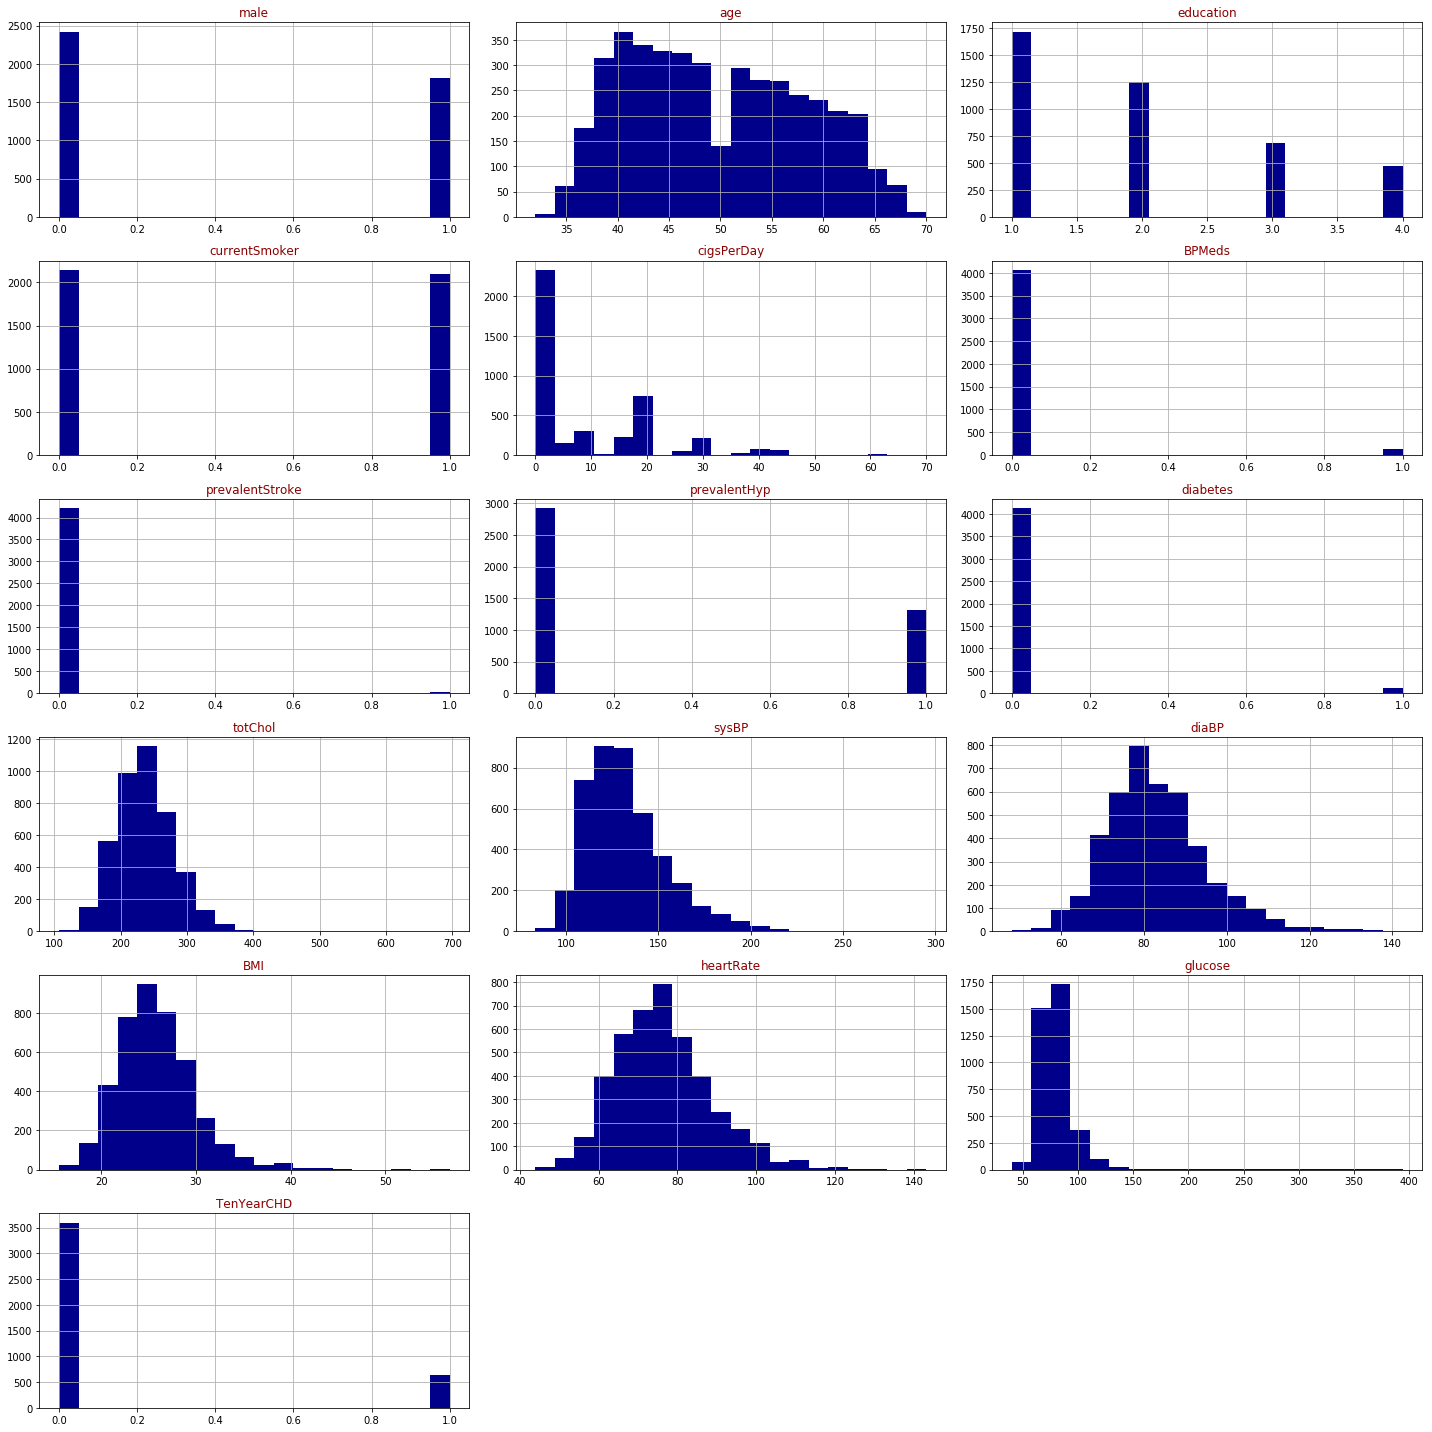

In [0]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

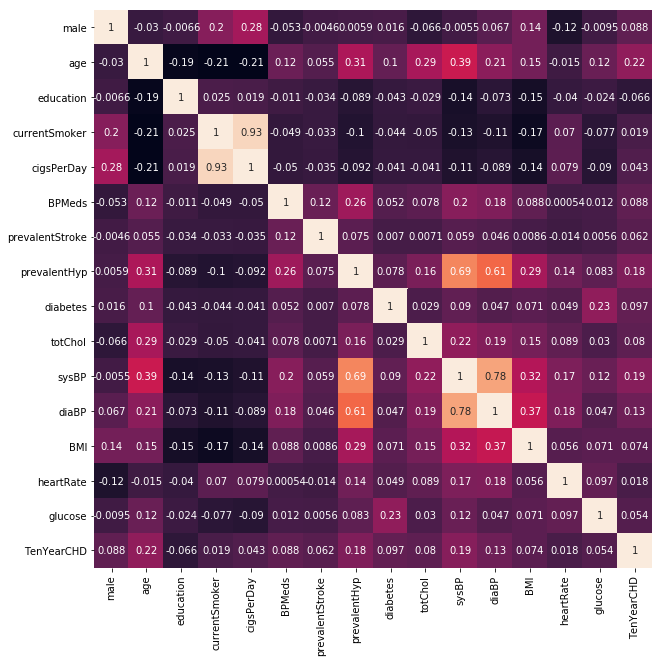

In [0]:
corr = hd.corr(method = 'spearman')
plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


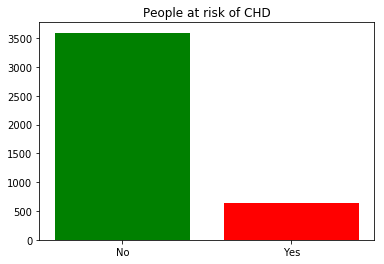

In [0]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [0]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


# Dropping irrelevant columns

In [0]:
hd.drop(['education'], axis = 1, inplace = True)

# Imputing values using different techniques

In [0]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
hd_i = pd.DataFrame(IterativeImputer().fit_transform(hd))
hd_i.columns = hd.columns
#hd_ii = pd.DataFrame(KNN(k = 5).fit_transform(hd))
#hd_ii.columns = hd.columns
#hd_iii = pd.DataFrame(NuclearNormMinimization().fit_transform(hd))
#hd_iii.columns = hd.columns
#hd_iv = pd.DataFrame(SoftImpute().fit_transform(hd))
#hd_iv.columns = hd.columns
#hd_v = pd.DataFrame(BiScaler().fit_transform(hd))
#hd_v.columns = hd.columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
hd_i.head(20)
#hd_ii.head(20)
#hd_iii.head(20)
#hd_iv.head(20)
#hd_v.head(20)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
5,0.0,43.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.000000,0.0
6,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.000000,1.0
7,0.0,45.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.000000,0.0
8,1.0,52.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.000000,0.0
9,1.0,43.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.000000,0.0


# Creating the training and testing data

In [0]:
attrib = hd_i.iloc[:, :-1]
lab = hd_i.iloc[:, -1]

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1)
attrib = np.array(attrib)
lab = np.array(lab)
for train_index, test_index in sss.split(attrib, lab):
    x_train, x_test = attrib[train_index], attrib[test_index]
    y_train, y_test = lab[train_index], lab[test_index]

# Creating and compiling the neural network model
### The model contains two hidden layers, each with 200 neurons. Dropout and regularization are applied to ensure that there is no overfitting

In [0]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01))) 
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
__________

# Defining functions to better understand the training process
### One function prints the average accuracy and loss, the other plots the values for loss and accuracy accross a training session


In [0]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_acc'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['acc'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [0]:
def plots(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Training the model

Instructions for updating:
Use tf.cast instead.
Train on 2544 samples, validate on 848 samples
Epoch 1/50
2544/2544 [==============================] - 2s 681us/step - loss: 2031.3653 - acc: 0.5071 - val_loss: 199.4210 - val_acc: 0.3774
Epoch 2/50
2544/2544 [==============================] - 0s 140us/step - loss: 183.4132 - acc: 0.5197 - val_loss: 140.0778 - val_acc: 0.4175
Epoch 3/50
2544/2544 [==============================] - 0s 134us/step - loss: 131.0189 - acc: 0.4662 - val_loss: 101.2775 - val_acc: 0.3809
Epoch 4/50
2544/2544 [==============================] - 0s 129us/step - loss: 101.8452 - acc: 0.4717 - val_loss: 86.9322 - val_acc: 0.2771
Epoch 5/50
2544/2544 [==============================] - 0s 138us/step - loss: 89.6779 - acc: 0.4564 - val_loss: 79.7858 - val_acc: 0.3408
Epoch 6/50
2544/2544 [==============================] - 0s 137us/step - loss: 84.1423 - acc: 0.4481 - val_loss: 75.9116 - val_acc: 0.2724
Epoch 7/50
2544/2544 [==============================] - 0s 134us/step

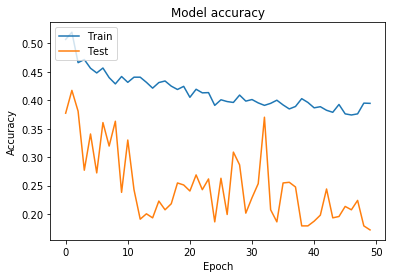

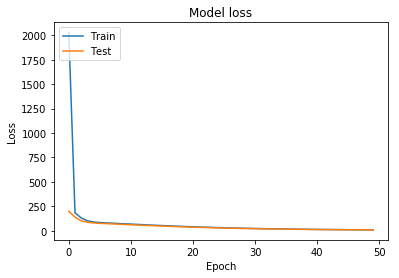

Train on 2544 samples, validate on 848 samples
Epoch 1/50
2544/2544 [==============================] - 0s 145us/step - loss: 9.0779 - acc: 0.3707 - val_loss: 8.2582 - val_acc: 0.2205
Epoch 2/50
2544/2544 [==============================] - 0s 133us/step - loss: 8.7880 - acc: 0.3852 - val_loss: 7.9451 - val_acc: 0.2028
Epoch 3/50
2544/2544 [==============================] - 0s 137us/step - loss: 8.4382 - acc: 0.3923 - val_loss: 7.7480 - val_acc: 0.1757
Epoch 4/50
2544/2544 [==============================] - 0s 139us/step - loss: 8.0996 - acc: 0.3950 - val_loss: 7.4218 - val_acc: 0.1816
Epoch 5/50
2544/2544 [==============================] - 0s 134us/step - loss: 7.8536 - acc: 0.3817 - val_loss: 7.3060 - val_acc: 0.2877
Epoch 6/50
2544/2544 [==============================] - 0s 131us/step - loss: 7.5838 - acc: 0.3844 - val_loss: 7.0300 - val_acc: 0.2748
Epoch 7/50
2544/2544 [==============================] - 0s 136us/step - loss: 7.3826 - acc: 0.3711 - val_loss: 6.8032 - val_acc: 0.2642
E

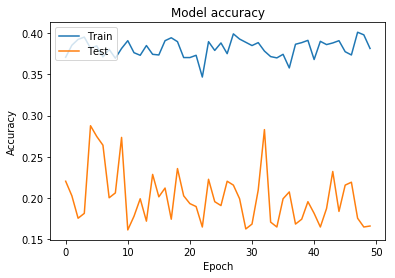

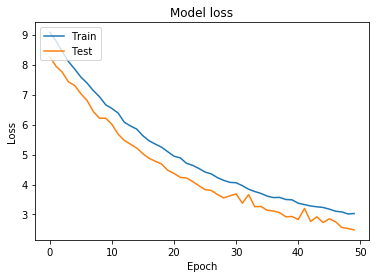

Train on 2544 samples, validate on 848 samples
Epoch 1/50
2544/2544 [==============================] - 0s 138us/step - loss: 3.0368 - acc: 0.3664 - val_loss: 2.7175 - val_acc: 0.1627
Epoch 2/50
2544/2544 [==============================] - 0s 132us/step - loss: 2.9753 - acc: 0.3801 - val_loss: 2.6093 - val_acc: 0.1663
Epoch 3/50
2544/2544 [==============================] - 0s 137us/step - loss: 3.0038 - acc: 0.3785 - val_loss: 2.4909 - val_acc: 0.1675
Epoch 4/50
2544/2544 [==============================] - 0s 132us/step - loss: 2.9358 - acc: 0.3699 - val_loss: 2.3891 - val_acc: 0.1639
Epoch 5/50
2544/2544 [==============================] - 0s 132us/step - loss: 2.8910 - acc: 0.3821 - val_loss: 2.3941 - val_acc: 0.1887
Epoch 6/50
2544/2544 [==============================] - 0s 135us/step - loss: 2.8544 - acc: 0.4053 - val_loss: 2.4530 - val_acc: 0.2193
Epoch 7/50
2544/2544 [==============================] - 0s 134us/step - loss: 2.8365 - acc: 0.3903 - val_loss: 2.3583 - val_acc: 0.1757
E

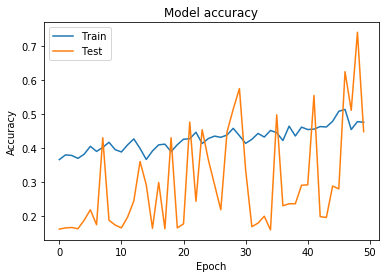

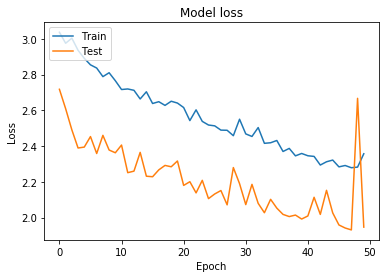

Train on 2544 samples, validate on 848 samples
Epoch 1/50
2544/2544 [==============================] - 0s 136us/step - loss: 2.2858 - acc: 0.4886 - val_loss: 1.9964 - val_acc: 0.5920
Epoch 2/50
2544/2544 [==============================] - 0s 134us/step - loss: 2.2252 - acc: 0.4744 - val_loss: 2.0237 - val_acc: 0.6085
Epoch 3/50
2544/2544 [==============================] - 0s 138us/step - loss: 2.2150 - acc: 0.4898 - val_loss: 2.0063 - val_acc: 0.2005
Epoch 4/50
2544/2544 [==============================] - 0s 134us/step - loss: 2.2245 - acc: 0.5000 - val_loss: 1.9919 - val_acc: 0.6309
Epoch 5/50
2544/2544 [==============================] - 0s 137us/step - loss: 2.2020 - acc: 0.5373 - val_loss: 1.9608 - val_acc: 0.2712
Epoch 6/50
2544/2544 [==============================] - 0s 139us/step - loss: 2.1794 - acc: 0.5212 - val_loss: 1.9539 - val_acc: 0.3337
Epoch 7/50
2544/2544 [==============================] - 0s 140us/step - loss: 2.1892 - acc: 0.6561 - val_loss: 2.4848 - val_acc: 0.5849
E

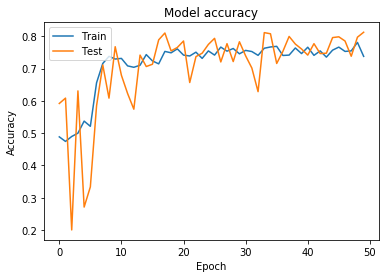

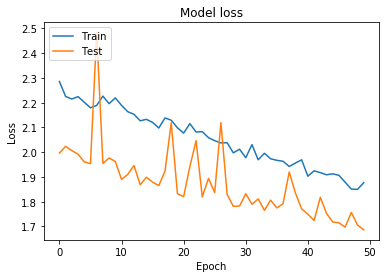

Train on 2544 samples, validate on 848 samples
Epoch 1/50
2544/2544 [==============================] - 0s 151us/step - loss: 1.8893 - acc: 0.7472 - val_loss: 1.7341 - val_acc: 0.8054
Epoch 2/50
2544/2544 [==============================] - 0s 129us/step - loss: 1.8508 - acc: 0.7630 - val_loss: 1.7220 - val_acc: 0.7618
Epoch 3/50
2544/2544 [==============================] - 0s 130us/step - loss: 1.8571 - acc: 0.7630 - val_loss: 1.7342 - val_acc: 0.7960
Epoch 4/50
2544/2544 [==============================] - 0s 132us/step - loss: 1.8477 - acc: 0.7630 - val_loss: 1.6853 - val_acc: 0.7866
Epoch 5/50
2544/2544 [==============================] - 0s 130us/step - loss: 1.8789 - acc: 0.7685 - val_loss: 1.7382 - val_acc: 0.7559
Epoch 6/50
2544/2544 [==============================] - 0s 131us/step - loss: 1.8381 - acc: 0.7512 - val_loss: 1.6902 - val_acc: 0.7913
Epoch 7/50
2544/2544 [==============================] - 0s 133us/step - loss: 1.8115 - acc: 0.7622 - val_loss: 1.7145 - val_acc: 0.7241
E

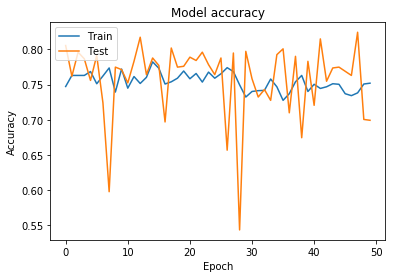

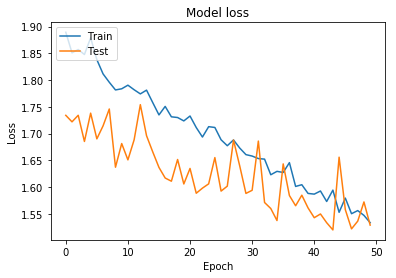

In [0]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
#n_epochs = [50, 45, 40, 35, 30]
class_weights = {0:1.0, 1:4.75}
for i in range(5):    
    history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 32, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)
    stats_avg(history, i = 50)
    plots(history)
    

# Testing and evaluating the model

In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.6745283018867925


,Predicted: 0,Predicted: 1
Actual:0,485,234
Actual:1,42,87


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       719
           1       0.27      0.67      0.39       129

    accuracy                           0.67       848
   macro avg       0.60      0.67      0.58       848
weighted avg       0.82      0.67      0.72       848

